 In this report, we're diving into the realm of insurance costs forecasting, using a mix of demographics and medical data.

We aim to find the best way to predict these costs, comparing different methods like Random Forest, Linear Regression, and Support Vector Regressor.

In [24]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
df = pd.read_csv("insurance.csv")

# Data exploration
print(df.head())
print(df.describe())

# Separate features and target variable
X = df.drop('insurance_cost', axis=1)
y = df['insurance_cost']


   age  gender     bmi  children smoker     region  insurance_cost
0   18    male  33.770         1     no  southeast      1725.55230
1   18    male  34.100         0     no  southeast      1137.01100
2   18  female  26.315         0     no  northeast      2198.18985
3   18  female  38.665         2     no  northeast      3393.35635
4   18  female  35.625         0     no  northeast      2211.13075
               age          bmi     children  insurance_cost
count  1338.000000  1338.000000  1338.000000     1338.000000
mean     39.207025    30.663397     1.094918    13270.422265
std      14.049960     6.098187     1.205493    12110.011237
min      18.000000    15.960000     0.000000     1121.873900
25%      27.000000    26.296250     0.000000     4740.287150
50%      39.000000    30.400000     1.000000     9382.033000
75%      51.000000    34.693750     2.000000    16639.912515
max      64.000000    53.130000     5.000000    63770.428010


In [7]:
# Preprocessing pipeline
preprocess_pipeline = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ['age', 'bmi', 'children']),
        ("cat", OneHotEncoder(drop='first', sparse=False), ['gender', 'smoker', 'region'])
    ],
    remainder='passthrough'
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Model training - Random Forest
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                       ('regressor', TransformedTargetRegressor(regressor=RandomForestRegressor(), func=np.log1p, inverse_func=np.expm1))
                      ])

param_grid = {
    'regressor__regressor__n_estimators': [100, 200, 300],
    'regressor__regressor__max_depth': [5, 10, 15]
}

search_rf = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5)
search_rf.fit(X_train, y_train)

# Best random forest model
rf_best_model = search_rf.best_estimator_
# Linear Regression
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                       ('regressor', TransformedTargetRegressor(regressor=LinearRegression(), func=np.log1p, inverse_func=np.expm1))
                      ])
pipe.fit(X_train, y_train)
lr_best_model = pipe
print(lr_best_model)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['gender', 'smoker',
                                                   'region'])])),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
# SVR
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                       ('regressor', TransformedTargetRegressor(regressor=SVR(), func=np.log1p, inverse_func=np.expm1))
                      ])
param_grid = {
    'regressor__regressor__kernel': ['linear', 'rbf'],
    'regressor__regressor__C': [0.1, 1, 10],
    'regressor__regressor__epsilon': [0.1, 0.2, 0.5]
}
search_svr = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5)
search_svr.fit(X_train, y_train)

# Best SVR model
svr_best_model = search_svr.best_estimator_
print(svr_best_model)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['gender', 'smoker',
                                                   'region'])])),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=SVR(C=1)))])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
# Model training - Random Forest
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                       ('regressor', TransformedTargetRegressor(regressor=RandomForestRegressor(), func=np.log1p, inverse_func=np.expm1))
                      ])

param_grid = {
    'regressor__regressor__n_estimators': [100, 200, 300],
    'regressor__regressor__max_depth': [5, 10, 15]
}

search_rf = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5)
search_rf.fit(X_train, y_train)

# Best random forest model
rf_best_model = search_rf.best_estimator_

# Linear Regression
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                       ('regressor', TransformedTargetRegressor(regressor=LinearRegression(), func=np.log1p, inverse_func=np.expm1))
                      ])
pipe.fit(X_train, y_train)
lr_best_model = pipe

print(lr_best_model)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['gender', 'smoker',
                                                   'region'])])),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
# SVR
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                       ('regressor', TransformedTargetRegressor(regressor=SVR(), func=np.log1p, inverse_func=np.expm1))
                      ])
param_grid = {
    'regressor__regressor__kernel': ['linear', 'rbf'],
    'regressor__regressor__C': [0.1, 1, 10],
    'regressor__regressor__epsilon': [0.1, 0.2, 0.5]
}
search_svr = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5)
search_svr.fit(X_train, y_train)

# Best SVR model
svr_best_model = search_svr.best_estimator_
print(svr_best_model)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['gender', 'smoker',
                                                   'region'])])),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=SVR(C=1)))])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
# Model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

rf_mse, rf_mae, rf_r2 = evaluate_model(rf_best_model, X_test, y_test)
lr_mse, lr_mae, lr_r2 = evaluate_model(lr_best_model, X_test, y_test)
svr_mse, svr_mae, svr_r2 = evaluate_model(svr_best_model, X_test, y_test)

# Results
results_df = pd.DataFrame({
    'Random Forest': [rf_mse, rf_mae, rf_r2],
    'Linear Regression': [lr_mse, lr_mae, lr_r2],
    'SVR': [svr_mse, svr_mae, svr_r2]
}, index=['MSE', 'MAE', 'R2'])

print(results_df)


     Random Forest  Linear Regression           SVR
MSE   1.668968e+07       7.216759e+07  2.160643e+07
MAE   1.927720e+03       4.344437e+03  2.343482e+03
R2    8.818420e-01       4.890749e-01  8.470329e-01


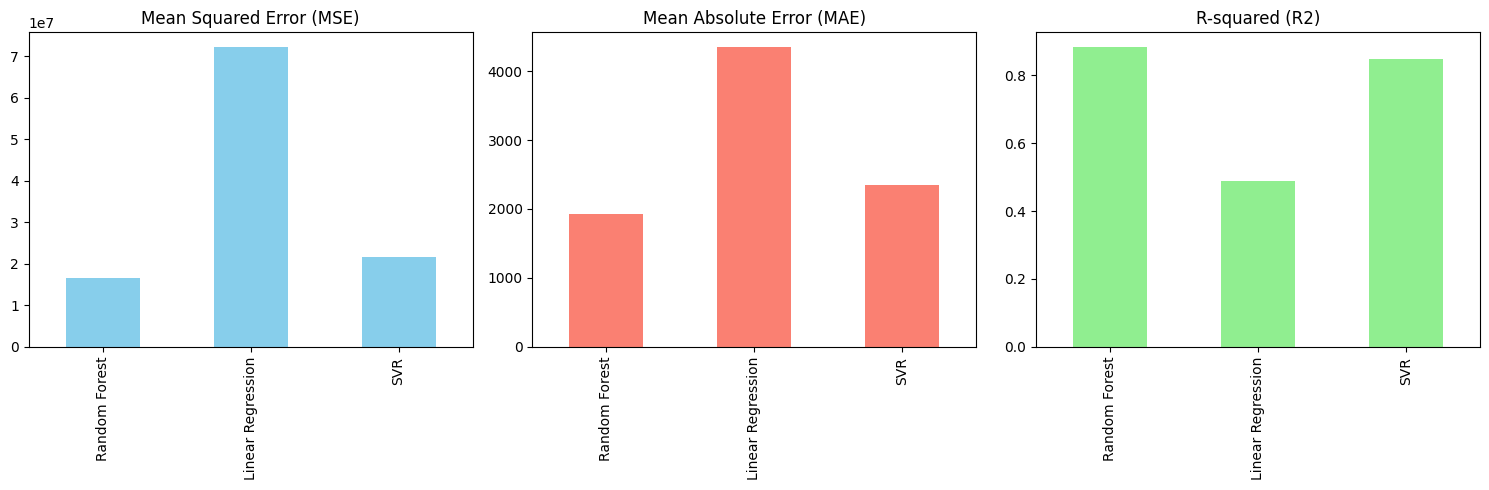

In [14]:
import matplotlib.pyplot as plt

# Create a DataFrame to store the results
# results_df = pd.DataFrame(results)

# Visualize the performance metrics
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
results_df.loc['MSE'].plot(kind='bar', ax=axes[0], color='skyblue', title='Mean Squared Error (MSE)')
results_df.loc['MAE'].plot(kind='bar', ax=axes[1], color='salmon', title='Mean Absolute Error (MAE)')
results_df.loc['R2'].plot(kind='bar', ax=axes[2], color='lightgreen', title='R-squared (R2)')
plt.tight_layout()
plt.show()




**Mean Squared Error (MSE):**
   - Random Forest has the lowest MSE ( 1.668968 *10^7 ), indicating the smallest average squared difference between predicted and actual values.
   - Linear Regression has the highest MSE ( 7.216759 * 10^7), indicating the largest average squared difference.
   - SVR's MSE is intermediate (2.160643 * 10^7), suggesting moderate performance.

**Mean Absolute Error (MAE):**
   - Random Forest has the lowest MAE ( 1.927720 * 10^3), indicating the smallest average absolute difference between predicted and actual values.
   - Linear Regression has the highest MAE ( 4.344437 * 10^3 ), indicating larger average absolute errors.
   - SVR's MAE ( 2.343482 * 10^3) falls between Random Forest and Linear Regression, indicating moderate performance.

**R-squared (R2):**
   - Random Forest has the highest R2 value (8.818420 * 10^{-1}), indicating that it explains the largest proportion of the variance in the data.
   - Linear Regression has the lowest R2 value (4.890749 * 10^{-1}), indicating poorer fit to the data.
   - SVR's R2 value (8.470329 * 10^{-1}) falls between Random Forest and Linear Regression, indicating moderate performance in explaining the variance.

In summary, based on the provided numeric values, Random Forest outperforms Linear Regression and SVR in terms of MSE, MAE, and R2, indicating better predictive performance and ability to explain variance in the data. Linear Regression performs the worst, while SVR demonstrates moderate performance across the metrics.

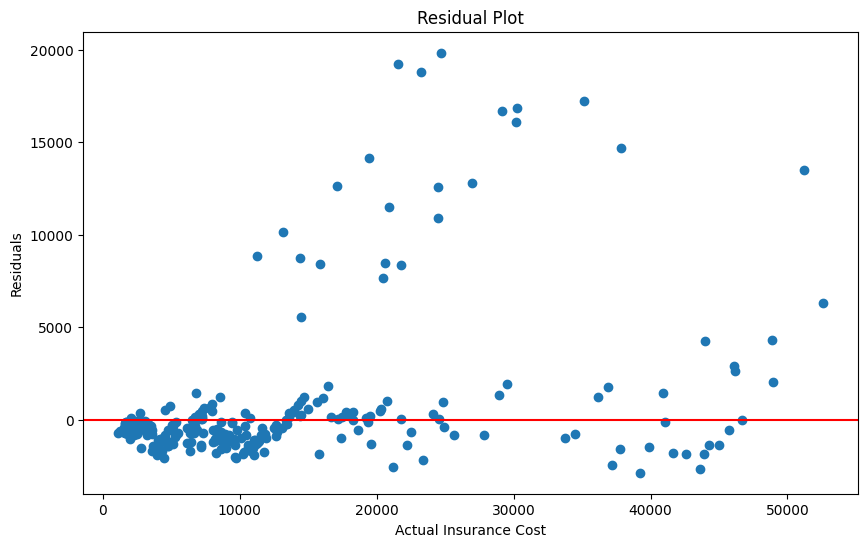

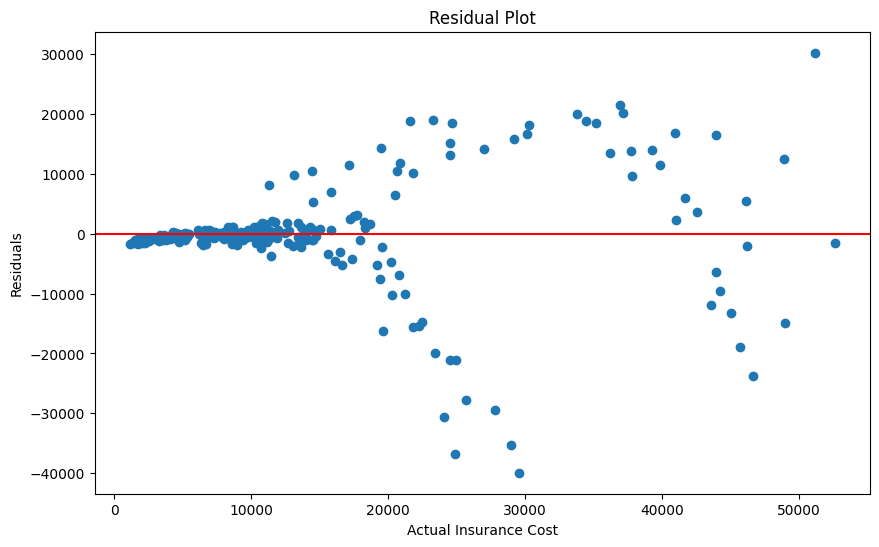

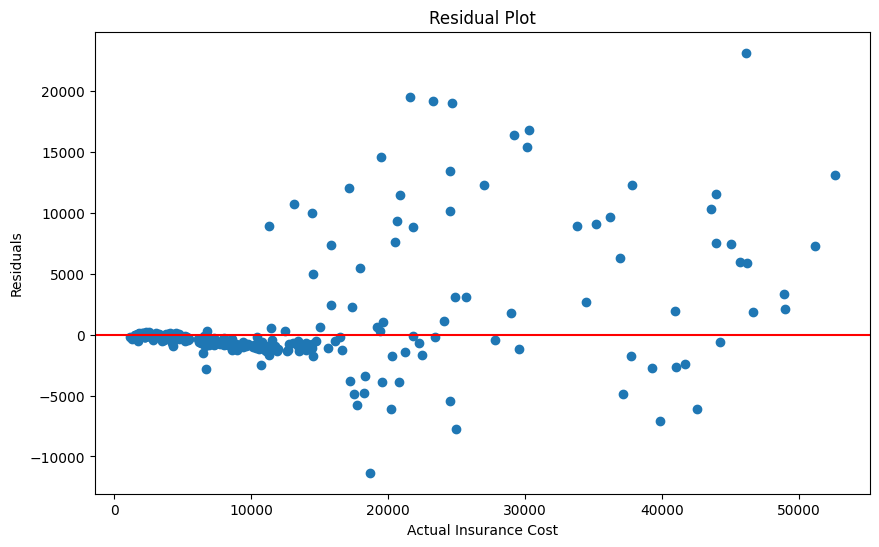

In [23]:
# Residual Plots
def plot_residuals(model, X_test, y_test):
    residuals = y_test - model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, residuals)
    plt.xlabel("Actual Insurance Cost")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.axhline(y=0, color='r', linestyle='-')
    plt.show()

plot_residuals(rf_best_model, X_test, y_test)
plot_residuals(lr_best_model, X_test, y_test)
plot_residuals(svr_best_model, X_test, y_test)




These plots show the difference between the observed and predicted values. They can help us identify patterns in the errors.

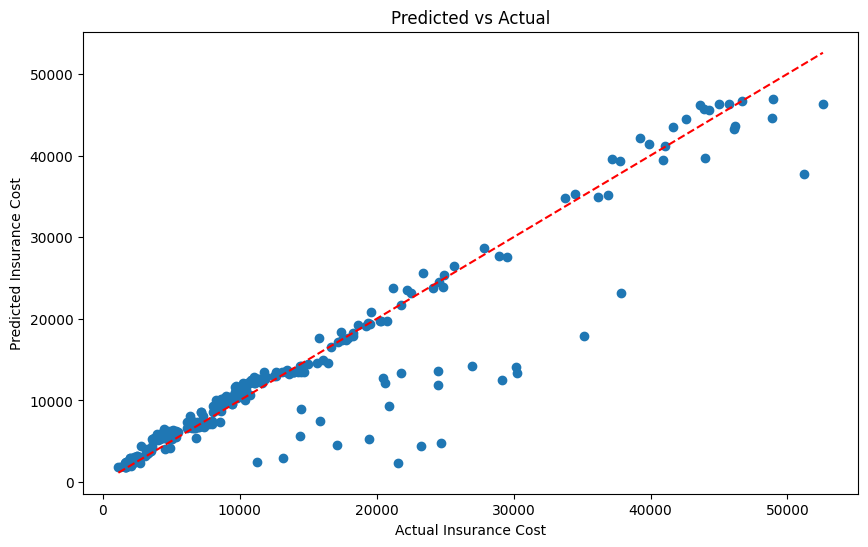

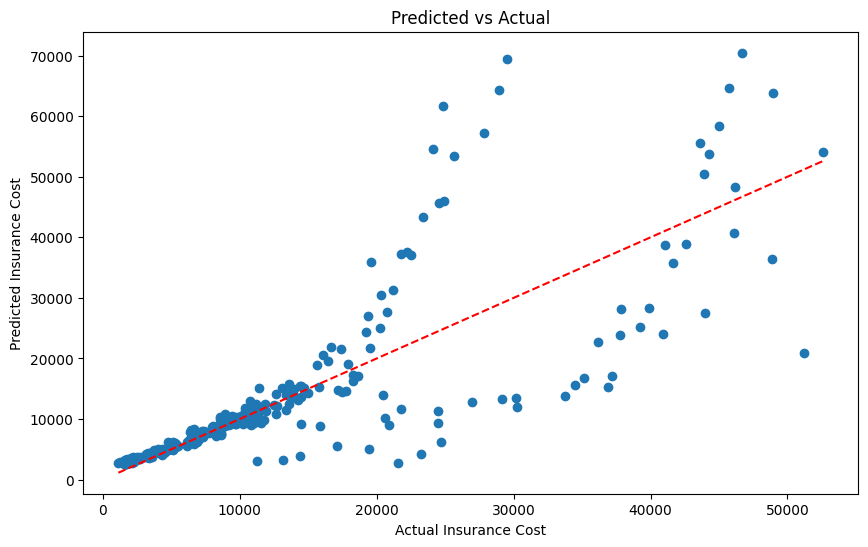

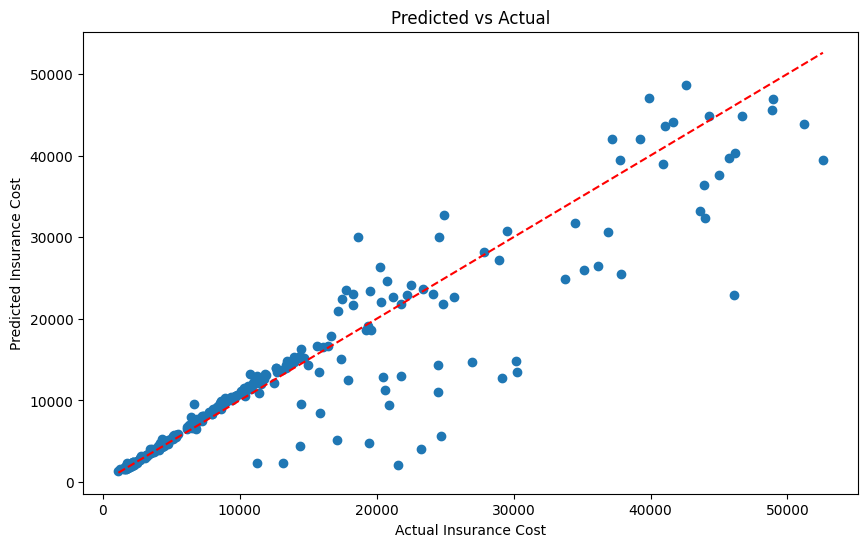

In [22]:
# Predicted vs Actual Scatter Plot
def plot_predicted_vs_actual(model, X_test, y_test):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel("Actual Insurance Cost")
    plt.ylabel("Predicted Insurance Cost")
    plt.title("Predicted vs Actual")
    plt.show()

plot_predicted_vs_actual(rf_best_model, X_test, y_test)
plot_predicted_vs_actual(lr_best_model, X_test, y_test)
plot_predicted_vs_actual(svr_best_model, X_test, y_test)

This plot directly compares the predicted insurance costs with the actual costs, giving us an idea of how well the model is performing.


**Mean Squared Error (MSE):**
   - Random Forest has the lowest MSE ( 1.668968 *10^7 ), indicating the smallest average squared difference between predicted and actual values.
   - Linear Regression has the highest MSE ( 7.216759 * 10^7), indicating the largest average squared difference.
   - SVR's MSE is intermediate (2.160643 * 10^7), suggesting moderate performance.

**Mean Absolute Error (MAE):**
   - Random Forest has the lowest MAE ( 1.927720 * 10^3), indicating the smallest average absolute difference between predicted and actual values.
   - Linear Regression has the highest MAE ( 4.344437 * 10^3 ), indicating larger average absolute errors.
   - SVR's MAE ( 2.343482 * 10^3) falls between Random Forest and Linear Regression, indicating moderate performance.

**R-squared (R2):**
   - Random Forest has the highest R2 value (8.818420 * 10^{-1}), indicating that it explains the largest proportion of the variance in the data.
   - Linear Regression has the lowest R2 value (4.890749 * 10^{-1}), indicating poorer fit to the data.
   - SVR's R2 value (8.470329 * 10^{-1}) falls between Random Forest and Linear Regression, indicating moderate performance in explaining the variance.

In summary, based on the provided numeric values, Random Forest outperforms Linear Regression and SVR in terms of MSE, MAE, and R2, indicating better predictive performance and ability to explain variance in the data. Linear Regression performs the worst, while SVR demonstrates moderate performance across the metrics.